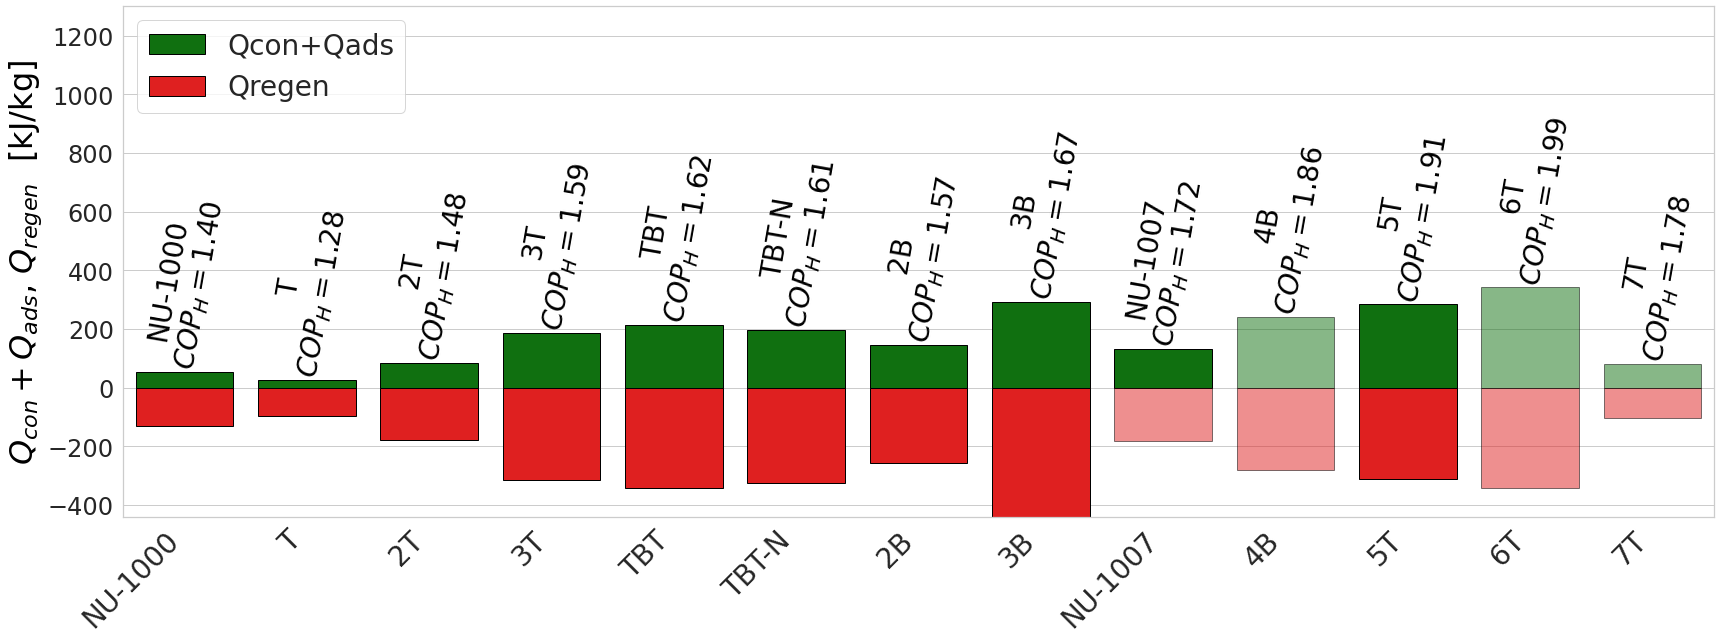

In [1]:
# importing modules and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data loading
df = pd.read_csv('Heating_calc1.csv')

# Set the style for the plot (optional, for a scientific publication look)
sns.set(style="whitegrid", font_scale=1.2)

# Create a new figure with the same size as the example
fig, ax = plt.subplots(figsize=(24, 9))

# Create a barplot using Seaborn for Qev and Qregen
barplot_qev = sns.barplot(x=df['name'], y=df['Qcon+Qads'], color='green', label='Qcon+Qads', ax=ax)
barplot_qregen = sns.barplot(x=df['name'], y=-df['Qregen'], color='red', label='Qregen', ax=ax)

# Surround all bars with black line
for patch in barplot_qev.patches:
    patch.set_edgecolor('black')
for patch in barplot_qregen.patches:
    patch.set_edgecolor('black')

# Add 'name' labels above Qev bars with deltaW and COPc
for i, (name, COPh) in enumerate(zip(df['name'], df['COPh'])):
    ax.text(i, df['Qcon+Qads'][i] + 2, f"{name}\n$COP_H={COPh:.2f}$", color='black', ha='center', fontsize=28, va='bottom', rotation=80)

# Rotate x-axis labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=28)

plt.yticks(fontsize=24)

# Set plot labels and title
ax.set_xlabel('')
ax.set_ylabel('$Q_{con} + Q_{ads}$, $Q_{regen}$  [kJ/kg]', color='black', fontsize=32)
plt.ylim(-440.0, 1300.0)

# Add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left',fontsize=28)

# Define the bars to fade
fade_bars_qev = ['4B', '6T', '7T']
fade_bars_qregen = ['T', '2T',  'TBT-N', 'TBT']

# Fading specific bars for Qev
for bar in fade_bars_qev:
    bar_index = df[df['name'] == bar].index[0]
    barplot_qev.patches[bar_index].set_alpha(0.5)  # Fading Qev bars

# Fading specific bars for Qregen
for bar in fade_bars_qregen:
    bar_index = -df[df['name'] == bar].index[0]
    barplot_qregen.patches[bar_index].set_alpha(0.5)  # Fading Qregen bars

# Set title using LaTeX formatting
plt.title(r'', fontsize=28, fontweight='bold')

# Adjust subplot parameters to remove gaps
plt.tight_layout()

# Save the plot
plt.savefig('HEATING_Qev_Qregen_COPh_Plot_with_FADE_06.07.2024_font28.png', dpi=600, bbox_inches='tight')

# Show the plot
plt.show()


In [ ]:
pwd